<a href="https://colab.research.google.com/github/HuyKhoi-code/CS114.K21/blob/master/leaf_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display

In [4]:
pip install tensorflow-object-detection-api

     |████████████████████████████████| 583kB 2.7MB/s 
     |████████████████████████████████| 61kB 6.5MB/s 
     |████████████████████████████████| 2.7MB 13.4MB/s 
  Created wheel for tensorflow-object-detection-api: filename=tensorflow_object_detection_api-0.1.1-cp36-none-any.whl size=844515 sha256=5ee8bd6213b891a23e88487e9a0da5b21a3d863215eda0f83b06bc7e86ed45be
  Stored in directory: /root/.cache/pip/wheels/4a/54/d0/cfca11930c4b2025d40dede77059094070a67cc3e7bd3b285f
Successfully built tensorflow-object-detection-api
ERROR: readme-renderer 26.0 has requirement Pygments>=2.5.1, but you'll have pygments 2.1.3 which is incompatible.


In [0]:
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [0]:
# patch tf1 into `utils.ops`
utils_ops.tf = tf.compat.v1

# Patch the location of gfile
tf.gfile = tf.io.gfile

In [0]:
import cv2
import time
import argparse
import multiprocessing

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip -uq "/content/drive/My Drive/Plant-Detection-Using-TensorFlow-master.zip" -d "/content/drive/My Drive/model"

In [0]:
MODEL_NAME = 'inference_graph'
IMAGE_NAME = 'TEST.jpg'

In [36]:
from google.colab import files
uploaded = files.upload()

Saving TEST.jpg to TEST.jpg


In [0]:
!mv "/content/TEST.jpg" "/content/drive/My Drive/model/Plant-Detection-Using-TensorFlow-master/Documents"

In [40]:
CWD_PATH = os.getcwd()

# Path to frozen detection graph .pb file, which contains the model that is used
# for object detection.
PATH_TO_CKPT = os.path.join(CWD_PATH,'drive/My Drive/model/Plant-Detection-Using-TensorFlow-master/',MODEL_NAME,'frozen_inference_graph.pb')

# Path to label map file
PATH_TO_LABELS = os.path.join(CWD_PATH,'drive/My Drive/model/Plant-Detection-Using-TensorFlow-master/','training','labelmap.pbtxt')

# Path to image
PATH_TO_IMAGE = os.path.join(CWD_PATH,'drive/My Drive/model/Plant-Detection-Using-TensorFlow-master/Documents',IMAGE_NAME)

# Number of classes the object detector can identify
NUM_CLASSES = 6

print (PATH_TO_IMAGE)


/content/drive/My Drive/model/Plant-Detection-Using-TensorFlow-master/Documents/TEST.jpg


In [0]:
# Load the label map.
# Label maps map indices to category names, so that when our convolution
# network predicts `5`, we know that this corresponds to `king`.
# Here we use internal utility functions, but anything that returns a
# dictionary mapping integers to appropriate string labels would be fine
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [0]:
# Load the Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.compat.v1.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

    sess = tf.compat.v1.Session(graph=detection_graph)

In [0]:
# Define input and output tensors (i.e. data) for the object detection classifier

# Input tensor is the image
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

# Output tensors are the detection boxes, scores, and classes
# Each box represents a part of the image where a particular object was detected
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

# Each score represents level of confidence for each of the objects.
# The score is shown on the result image, together with the class label.
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')

# Number of objects detected
num_detections = detection_graph.get_tensor_by_name('num_detections:0')

In [0]:
# Load image using OpenCV and
# expand image dimensions to have shape: [1, None, None, 3]
# i.e. a single-column array, where each item in the column has the pixel RGB value
image = cv2.imread(PATH_TO_IMAGE)
image_expanded = np.expand_dims(image, axis=0)

# Perform the actual detection by running the model with the image as input
(boxes, scores, classes, num) = sess.run(
    [detection_boxes, detection_scores, detection_classes, num_detections],
    feed_dict={image_tensor: image_expanded})

In [45]:
# Draw the results of the detection (aka 'visulaize the results')

vis_util.visualize_boxes_and_labels_on_image_array(
    image,
    np.squeeze(boxes),
    np.squeeze(classes).astype(np.int32),
    np.squeeze(scores),
    category_index,
    use_normalized_coordinates=True,
    line_thickness=8,
    min_score_thresh=0.80)

array([[[198, 222, 210],
        [151, 180, 165],
        [ 79, 115,  99],
        ...,
        [220, 222, 222],
        [233, 233, 233],
        [235, 233, 233]],

       [[198, 222, 210],
        [151, 180, 165],
        [ 78, 114,  98],
        ...,
        [239, 241, 241],
        [229, 229, 229],
        [235, 233, 233]],

       [[196, 220, 208],
        [149, 178, 163],
        [ 77, 113,  97],
        ...,
        [224, 226, 226],
        [233, 233, 233],
        [234, 232, 232]],

       ...,

       [[208, 202, 203],
        [206, 201, 202],
        [205, 203, 203],
        ...,
        [222, 224, 224],
        [224, 226, 226],
        [226, 226, 226]],

       [[208, 202, 203],
        [207, 202, 203],
        [206, 204, 204],
        ...,
        [223, 225, 225],
        [225, 227, 227],
        [227, 227, 227]],

       [[207, 202, 203],
        [208, 203, 204],
        [206, 204, 204],
        ...,
        [227, 227, 227],
        [226, 226, 226],
        [228, 228, 228]]

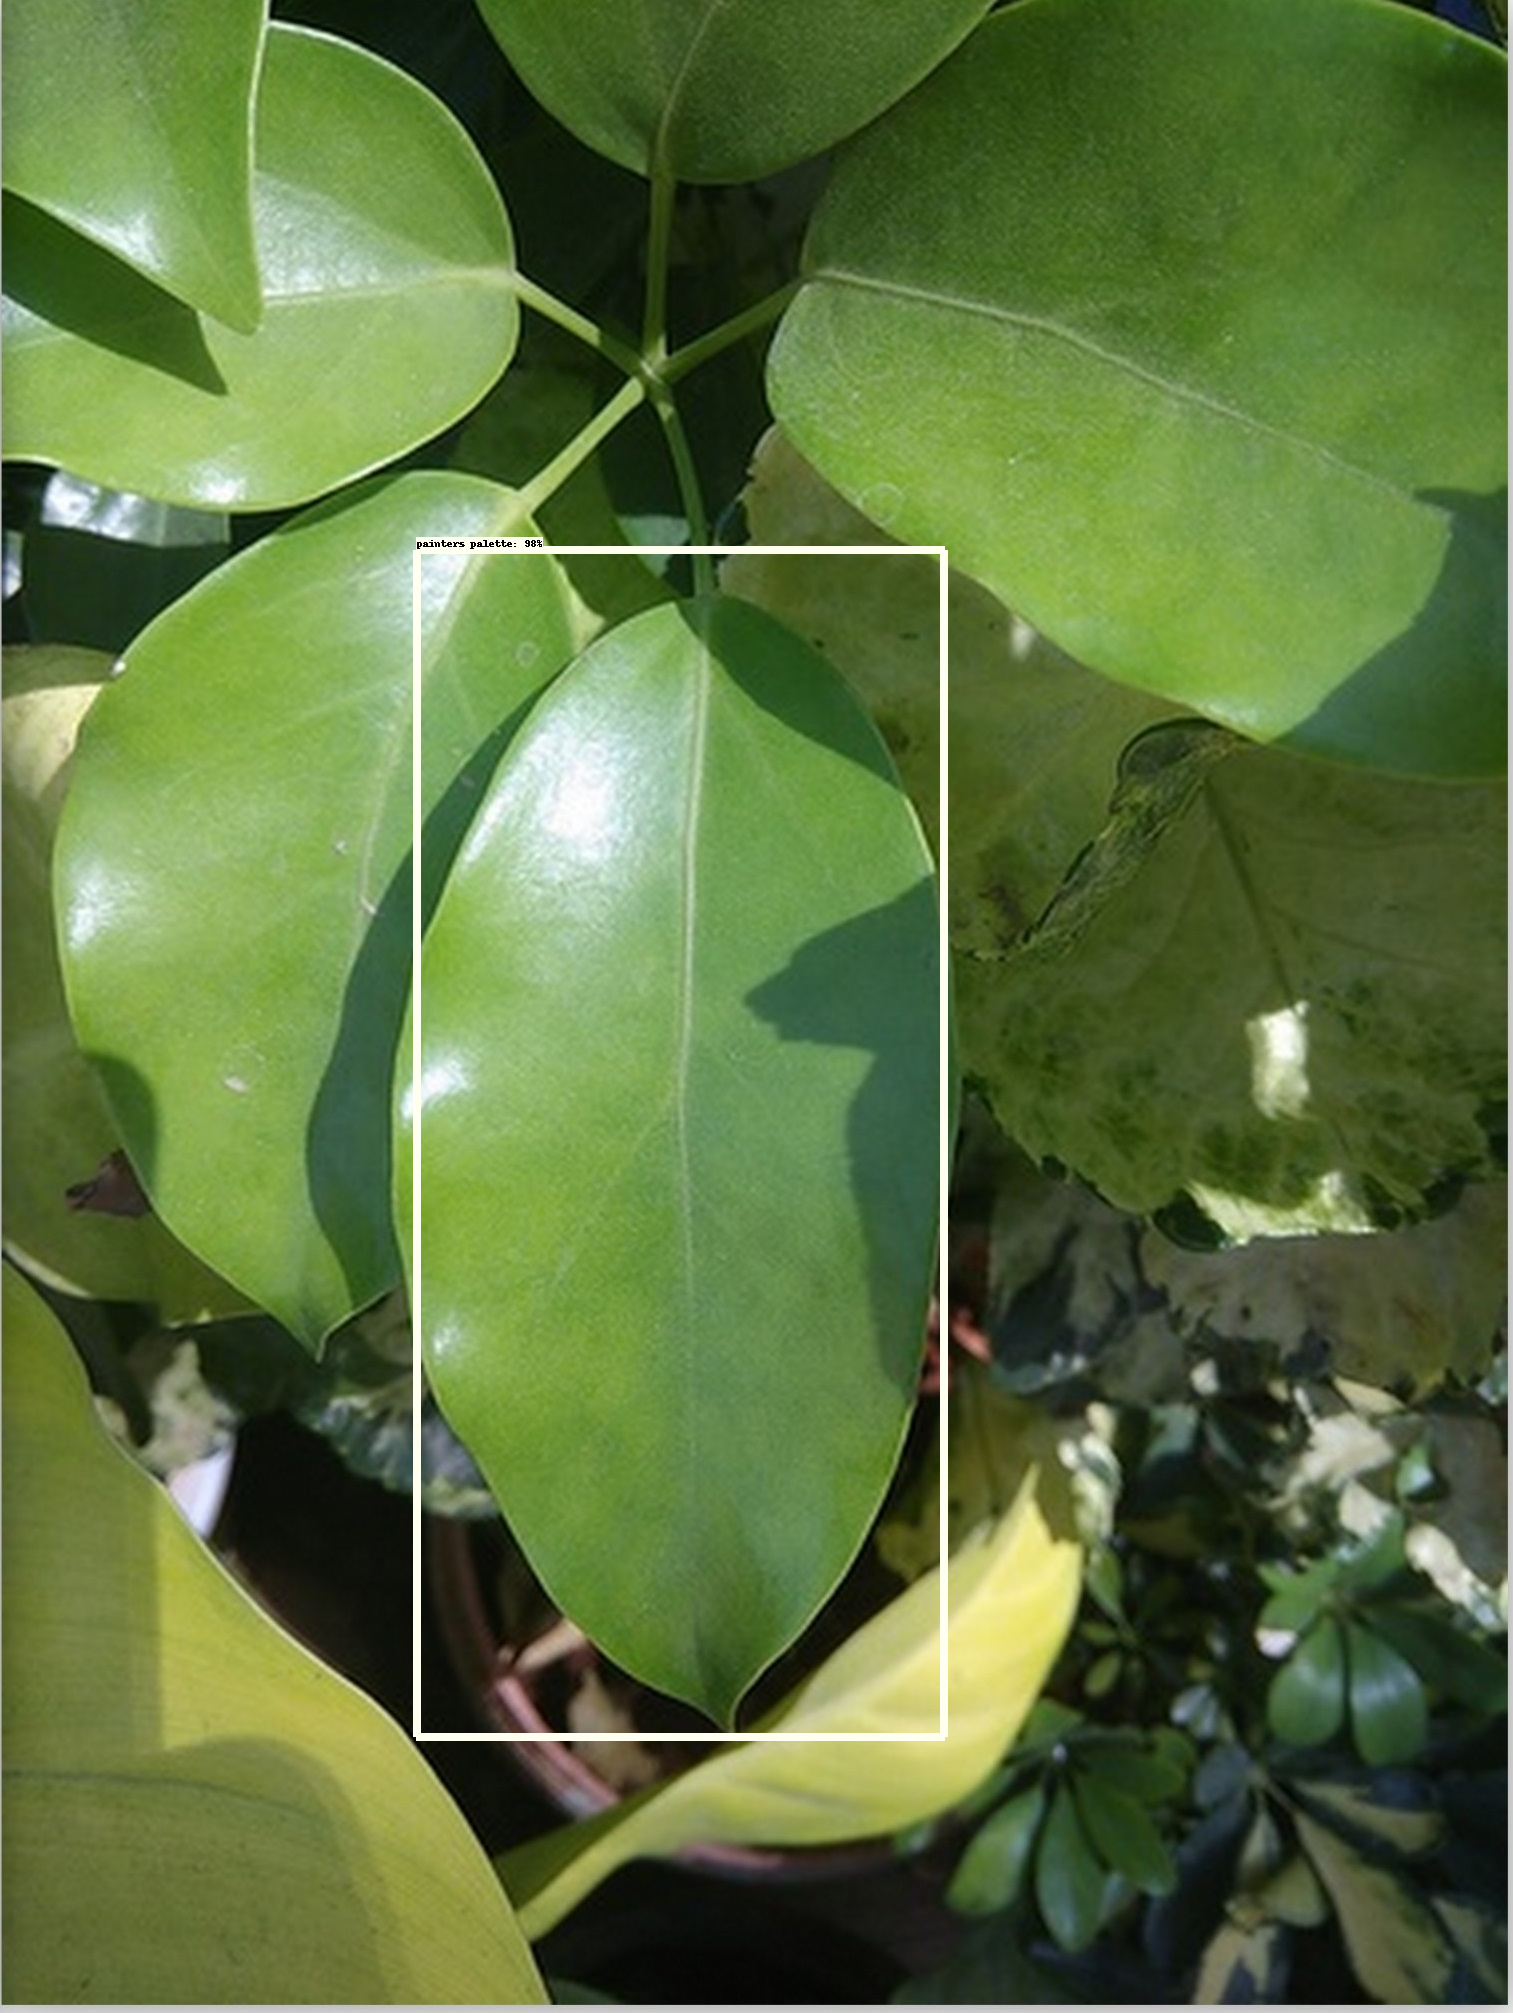

In [46]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)